## Problem Statement:

**Predict whether an individual earns more than 50k per year based on their personal attributes using a Random Forest classification model.**

## Steps followed below:

1. **Data Preparation:**
    - **Load Data:** Import the `salaries_final.csv` dataset.
    - **Data Cleaning:**
        - Handle missing values (represented by '?') in the dataset. This may involve imputation or removal of rows/columns.
        - Convert categorical variables like 'Education', 'Occupation', 'Relationship', 'Race', and 'Sex' into numerical representations using techniques like one-hot encoding.
    - **Data Splitting:** Divide the dataset into training and testing sets (e.g., 80% for training and 20% for testing).

2. **Model Training:**
    - **Import Libraries:** Import the `RandomForestClassifier` from `sklearn.ensemble`.
    - **Initialize Model:** Instantiate the `RandomForestClassifier` with appropriate hyperparameters (e.g., number of trees, maximum depth).
    - **Train Model:** Fit the model to the training data, using the personal attributes as features and 'Target' as the target variable.

3. **Model Evaluation:**
    - **Predict:** Use the trained model to predict the 'Target' variable for the testing data.
    - **Evaluate Performance:** Assess the model's performance using metrics like accuracy, precision, recall, and F1-score. Consider visualizing the results with a confusion matrix.

4. **Feature Importance:**
    - **Extract Feature Importances:** Access the feature importances calculated by the Random Forest model.
    - **Visualize Importances:** Create visualizations (e.g., bar chart) to represent the relative importance of each feature in predicting salary.
    - **Interpret Results:** Analyze the visualized feature importances to draw conclusions about which personal attributes are most influential in determining salary.

5. **Model Refinement:**
    - **Hyperparameter Tuning:** Experiment with different hyperparameter values (using techniques like Grid Search or Random Search) to optimize the model's performance.
    - **Feature Selection:**  Based on the feature importance analysis, consider selecting a subset of the most relevant features for model training. This can improve model efficiency and potentially performance.


In [47]:
import pandas as pd

df = pd.read_csv('salaries_final.csv')
df.head()

,Unnamed: 0,Age,Education,Occupation,Relationship,Race,Sex,Target
0,0,39,Bachelors,Adm-clerical,Not-in-family,White,Male,<=50K
1,1,50,Bachelors,Exec-managerial,Husband,White,Male,<=50K
2,2,38,HS-grad,Handlers-cleaners,Not-in-family,White,Male,<=50K
3,3,53,11th,Handlers-cleaners,Husband,Black,Male,<=50K
4,4,28,Bachelors,Prof-specialty,Wife,Black,Female,<=50K


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    32561 non-null  int64 
 1   Age           32561 non-null  int64 
 2   Education     32561 non-null  object
 3   Occupation    32561 non-null  object
 4   Relationship  32561 non-null  object
 5   Race          32561 non-null  object
 6   Sex           32561 non-null  object
 7   Target        32561 non-null  object
dtypes: int64(2), object(6)
memory usage: 2.0+ MB


<Axes: ylabel='Education'>

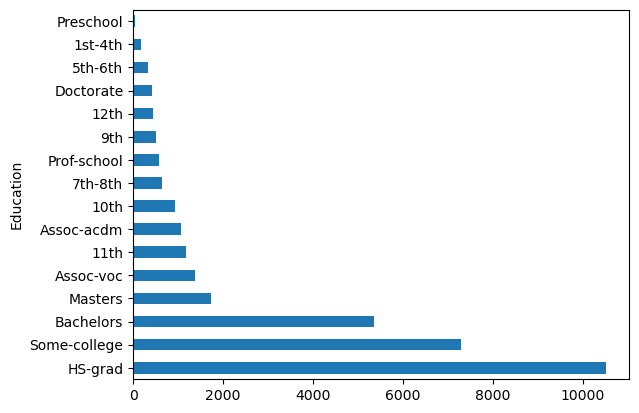

In [49]:
df.Education.value_counts().plot.barh()

<Axes: ylabel='Occupation'>

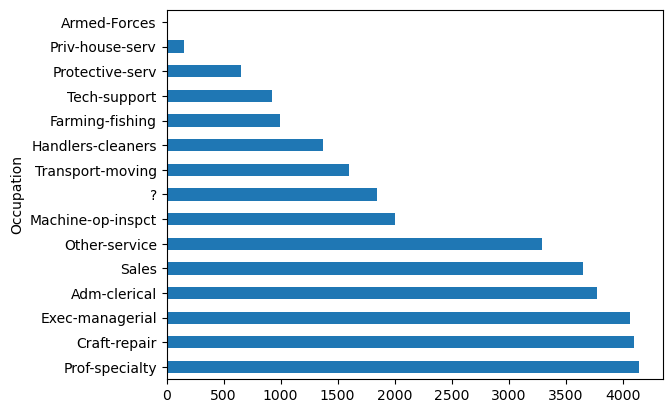

In [50]:
df.Occupation.value_counts().plot.barh()

<Axes: ylabel='Relationship'>

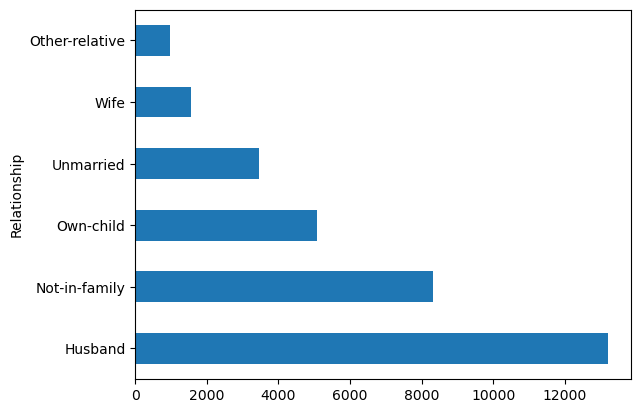

In [51]:
df.Relationship.value_counts().plot.barh()

<Axes: ylabel='Race'>

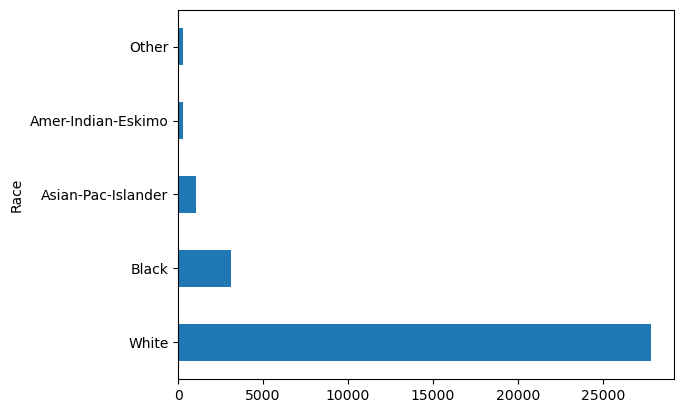

In [52]:
df.Race.value_counts().plot.barh()

<Axes: ylabel='Sex'>

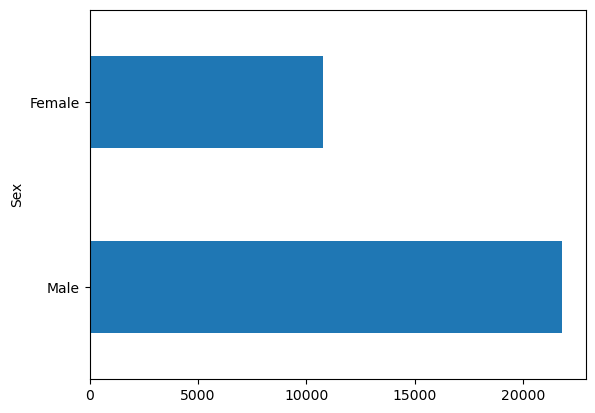

In [53]:
df.Sex.value_counts().plot.barh()

<Axes: ylabel='Target'>

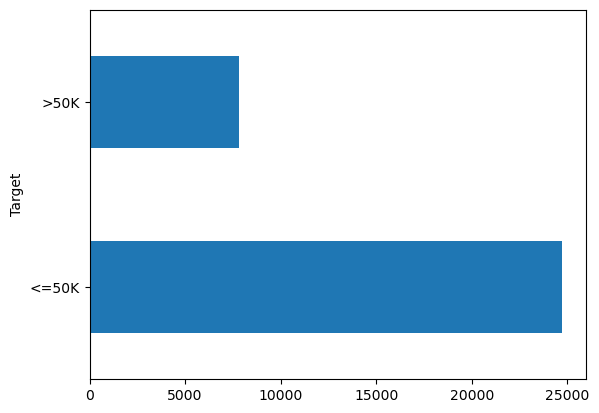

In [54]:
df.Target.value_counts().plot.barh()

In [55]:
df.isna().sum()

Unnamed: 0      0
Age             0
Education       0
Occupation      0
Relationship    0
Race            0
Sex             0
Target          0
dtype: int64

In [56]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [57]:
df.Occupation.replace('?', 'unknown', inplace = True)

In [58]:
df = pd.get_dummies(data = df, columns = ['Education', 'Occupation', 'Relationship', 'Race', 'Sex'], drop_first=True)

In [59]:
df['Target'] = df.Target.apply(lambda x: 0 if x == '<=50K' else 1)

In [60]:
from sklearn.model_selection import train_test_split

X = df.drop('Target', axis = 1)
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

clf.fit(X_train, y_train)

RandomForestClassifier()

In [62]:
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

accuracy_score(y_test, clf.predict(X_test))

0.8053124520190389

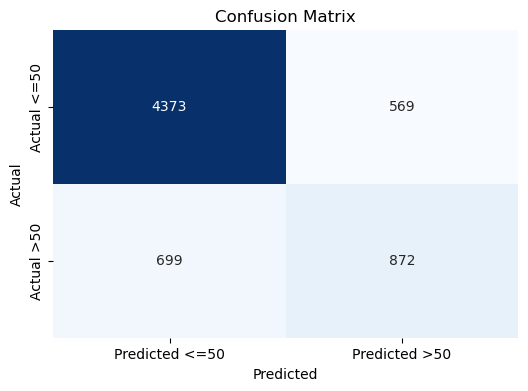

In [63]:
y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Predicted <=50', 'Predicted >50'], 
            yticklabels=['Actual <=50', 'Actual >50'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

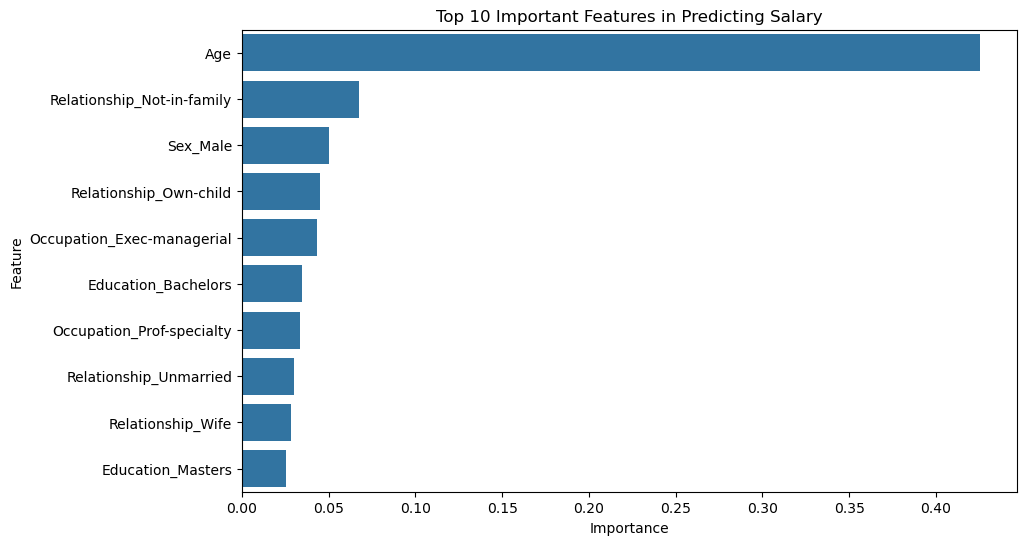

In [64]:
importances = clf.feature_importances_
feature_names = X.columns

# Creating a DataFrame for feature importances
feature_importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Plotting the top 10 important features
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances_df['Importance'][:10], y=feature_importances_df['Feature'][:10])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Top 10 Important Features in Predicting Salary")
plt.show()

In [65]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Initialize Grid Search with cross-validation
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [66]:
g_pred = grid_search.best_estimator_.predict(X_test)
accuracy_score(y_test, g_pred)

0.8291110087517273

### The trained Random Forest classifier predicts the salaray with 82% accuracy, other models like SVM can also be used to increase the accuracy